<a href="https://colab.research.google.com/github/DanielMSousa/curso-deeplearning-na-pratica/blob/main/Projeto_2_Previs%C3%A3o_do_uso_de_bicicletas_alugadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Definição do problema

- Referência da base de dados: 
    - This Hadi Fanaee-T
    - Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto INESC Porto, Campus da FEUP Rua Dr. Roberto Frias, 378 4200 - 465 Porto, Portugal


# Etapa 1: Importação das bibliotecas

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

'2.7.0'

# Etapa 2: Importação da base de dados

In [4]:
bike = pd.read_csv('bike-sharing-daily.csv')

In [5]:
bike

instant      dteday  season  yr  ...  windspeed  casual  registered   cnt
0          1    1/1/2011       1   0  ...   0.160446     331         654   985
1          2    1/2/2011       1   0  ...   0.248539     131         670   801
2          3    1/3/2011       1   0  ...   0.248309     120        1229  1349
3          4    1/4/2011       1   0  ...   0.160296     108        1454  1562
4          5    1/5/2011       1   0  ...   0.186900      82        1518  1600
..       ...         ...     ...  ..  ...        ...     ...         ...   ...
726      727  12/27/2012       1   1  ...   0.350133     247        1867  2114
727      728  12/28/2012       1   1  ...   0.155471     644        2451  3095
728      729  12/29/2012       1   1  ...   0.124383     159        1182  1341
729      730  12/30/2012       1   1  ...   0.350754     364        1432  1796
730      731  12/31/2012       1   1  ...   0.154846     439        2290  2729

[731 rows x 15 columns]

In [6]:
bike.head()

instant    dteday  season  yr  ...  windspeed  casual  registered   cnt
0        1  1/1/2011       1   0  ...   0.160446     331         654   985
1        2  1/2/2011       1   0  ...   0.248539     131         670   801
2        3  1/3/2011       1   0  ...   0.248309     120        1229  1349
3        4  1/4/2011       1   0  ...   0.160296     108        1454  1562
4        5  1/5/2011       1   0  ...   0.186900      82        1518  1600

[5 rows x 15 columns]

In [7]:
bike.tail(10)

instant      dteday  season  yr  ...  windspeed  casual  registered   cnt
721      722  12/22/2012       1   1  ...   0.407346     205        1544  1749
722      723  12/23/2012       1   1  ...   0.133083     408        1379  1787
723      724  12/24/2012       1   1  ...   0.077230     174         746   920
724      725  12/25/2012       1   1  ...   0.168726     440         573  1013
725      726  12/26/2012       1   1  ...   0.316546       9         432   441
726      727  12/27/2012       1   1  ...   0.350133     247        1867  2114
727      728  12/28/2012       1   1  ...   0.155471     644        2451  3095
728      729  12/29/2012       1   1  ...   0.124383     159        1182  1341
729      730  12/30/2012       1   1  ...   0.350754     364        1432  1796
730      731  12/31/2012       1   1  ...   0.154846     439        2290  2729

[10 rows x 15 columns]

In [8]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(3), int64(11), object(1)
memory usage: 85.8+ KB


In [9]:
bike.describe()

instant      season  ...   registered          cnt
count  731.000000  731.000000  ...   731.000000   731.000000
mean   366.000000    2.496580  ...  3656.172367  4504.348837
std    211.165812    1.110807  ...  1560.256377  1937.211452
min      1.000000    1.000000  ...    20.000000    22.000000
25%    183.500000    2.000000  ...  2497.000000  3152.000000
50%    366.000000    3.000000  ...  3662.000000  4548.000000
75%    548.500000    3.000000  ...  4776.500000  5956.000000
max    731.000000    4.000000  ...  6946.000000  8714.000000

[8 rows x 14 columns]

# Etapa 3: Limpeza da base de dados

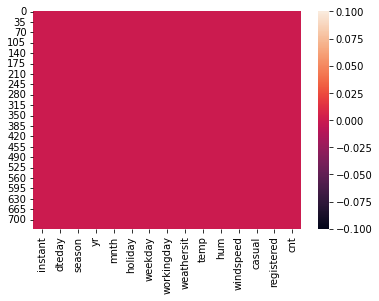

In [10]:
sns.heatmap(bike.isnull());

In [11]:
bike = bike.drop(labels=['instant'], axis = 1)

In [12]:
bike.head()

dteday  season  yr  mnth  ...  windspeed  casual  registered   cnt
0  1/1/2011       1   0     1  ...   0.160446     331         654   985
1  1/2/2011       1   0     1  ...   0.248539     131         670   801
2  1/3/2011       1   0     1  ...   0.248309     120        1229  1349
3  1/4/2011       1   0     1  ...   0.160296     108        1454  1562
4  1/5/2011       1   0     1  ...   0.186900      82        1518  1600

[5 rows x 14 columns]

In [13]:
bike = bike.drop(labels=['casual', 'registered'], axis = 1)

In [14]:
bike

dteday  season  yr  mnth  ...      temp       hum  windspeed   cnt
0      1/1/2011       1   0     1  ...  0.344167  0.805833   0.160446   985
1      1/2/2011       1   0     1  ...  0.363478  0.696087   0.248539   801
2      1/3/2011       1   0     1  ...  0.196364  0.437273   0.248309  1349
3      1/4/2011       1   0     1  ...  0.200000  0.590435   0.160296  1562
4      1/5/2011       1   0     1  ...  0.226957  0.436957   0.186900  1600
..          ...     ...  ..   ...  ...       ...       ...        ...   ...
726  12/27/2012       1   1    12  ...  0.254167  0.652917   0.350133  2114
727  12/28/2012       1   1    12  ...  0.253333  0.590000   0.155471  3095
728  12/29/2012       1   1    12  ...  0.253333  0.752917   0.124383  1341
729  12/30/2012       1   1    12  ...  0.255833  0.483333   0.350754  1796
730  12/31/2012       1   1    12  ...  0.215833  0.577500   0.154846  2729

[731 rows x 12 columns]

In [15]:
bike.dteday = pd.to_datetime(bike.dteday, format = '%m/%d/%Y')

In [16]:
bike.head()

dteday  season  yr  mnth  ...      temp       hum  windspeed   cnt
0 2011-01-01       1   0     1  ...  0.344167  0.805833   0.160446   985
1 2011-01-02       1   0     1  ...  0.363478  0.696087   0.248539   801
2 2011-01-03       1   0     1  ...  0.196364  0.437273   0.248309  1349
3 2011-01-04       1   0     1  ...  0.200000  0.590435   0.160296  1562
4 2011-01-05       1   0     1  ...  0.226957  0.436957   0.186900  1600

[5 rows x 12 columns]

In [17]:
bike.index = pd.DatetimeIndex(bike.dteday)

In [18]:
bike.head()

dteday  season  yr  mnth  ...      temp       hum  windspeed   cnt
dteday                                   ...                                     
2011-01-01 2011-01-01       1   0     1  ...  0.344167  0.805833   0.160446   985
2011-01-02 2011-01-02       1   0     1  ...  0.363478  0.696087   0.248539   801
2011-01-03 2011-01-03       1   0     1  ...  0.196364  0.437273   0.248309  1349
2011-01-04 2011-01-04       1   0     1  ...  0.200000  0.590435   0.160296  1562
2011-01-05 2011-01-05       1   0     1  ...  0.226957  0.436957   0.186900  1600

[5 rows x 12 columns]

In [19]:
bike = bike.drop(labels=['dteday'], axis=1)

In [20]:
bike.head()

season  yr  mnth  holiday  ...      temp       hum  windspeed   cnt
dteday                                 ...                                     
2011-01-01       1   0     1        0  ...  0.344167  0.805833   0.160446   985
2011-01-02       1   0     1        0  ...  0.363478  0.696087   0.248539   801
2011-01-03       1   0     1        0  ...  0.196364  0.437273   0.248309  1349
2011-01-04       1   0     1        0  ...  0.200000  0.590435   0.160296  1562
2011-01-05       1   0     1        0  ...  0.226957  0.436957   0.186900  1600

[5 rows x 11 columns]

# Etapa 4: Visualização da base de dados

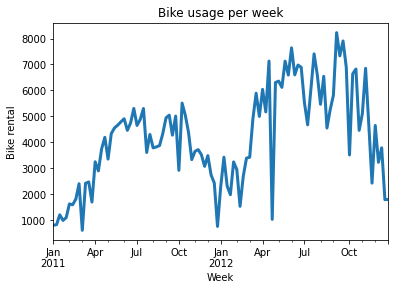

In [21]:
bike['cnt'].asfreq('W').plot(linewidth = 3)
plt.title('Bike usage per week')
plt.xlabel('Week')
plt.ylabel('Bike rental');

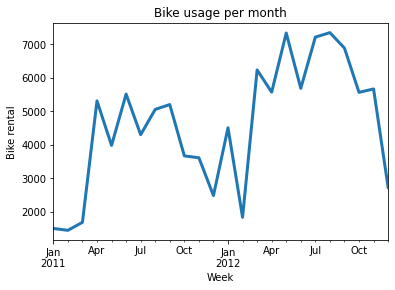

In [22]:
bike['cnt'].asfreq('M').plot(linewidth = 3)
plt.title('Bike usage per month')
plt.xlabel('Week')
plt.ylabel('Bike rental');

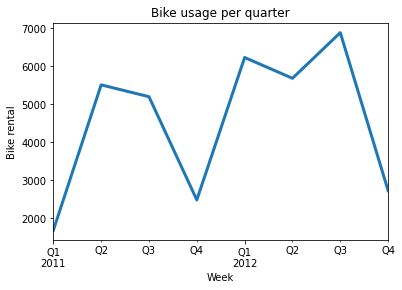

In [23]:
bike['cnt'].asfreq('Q').plot(linewidth = 3)
plt.title('Bike usage per quarter')
plt.xlabel('Week')
plt.ylabel('Bike rental');

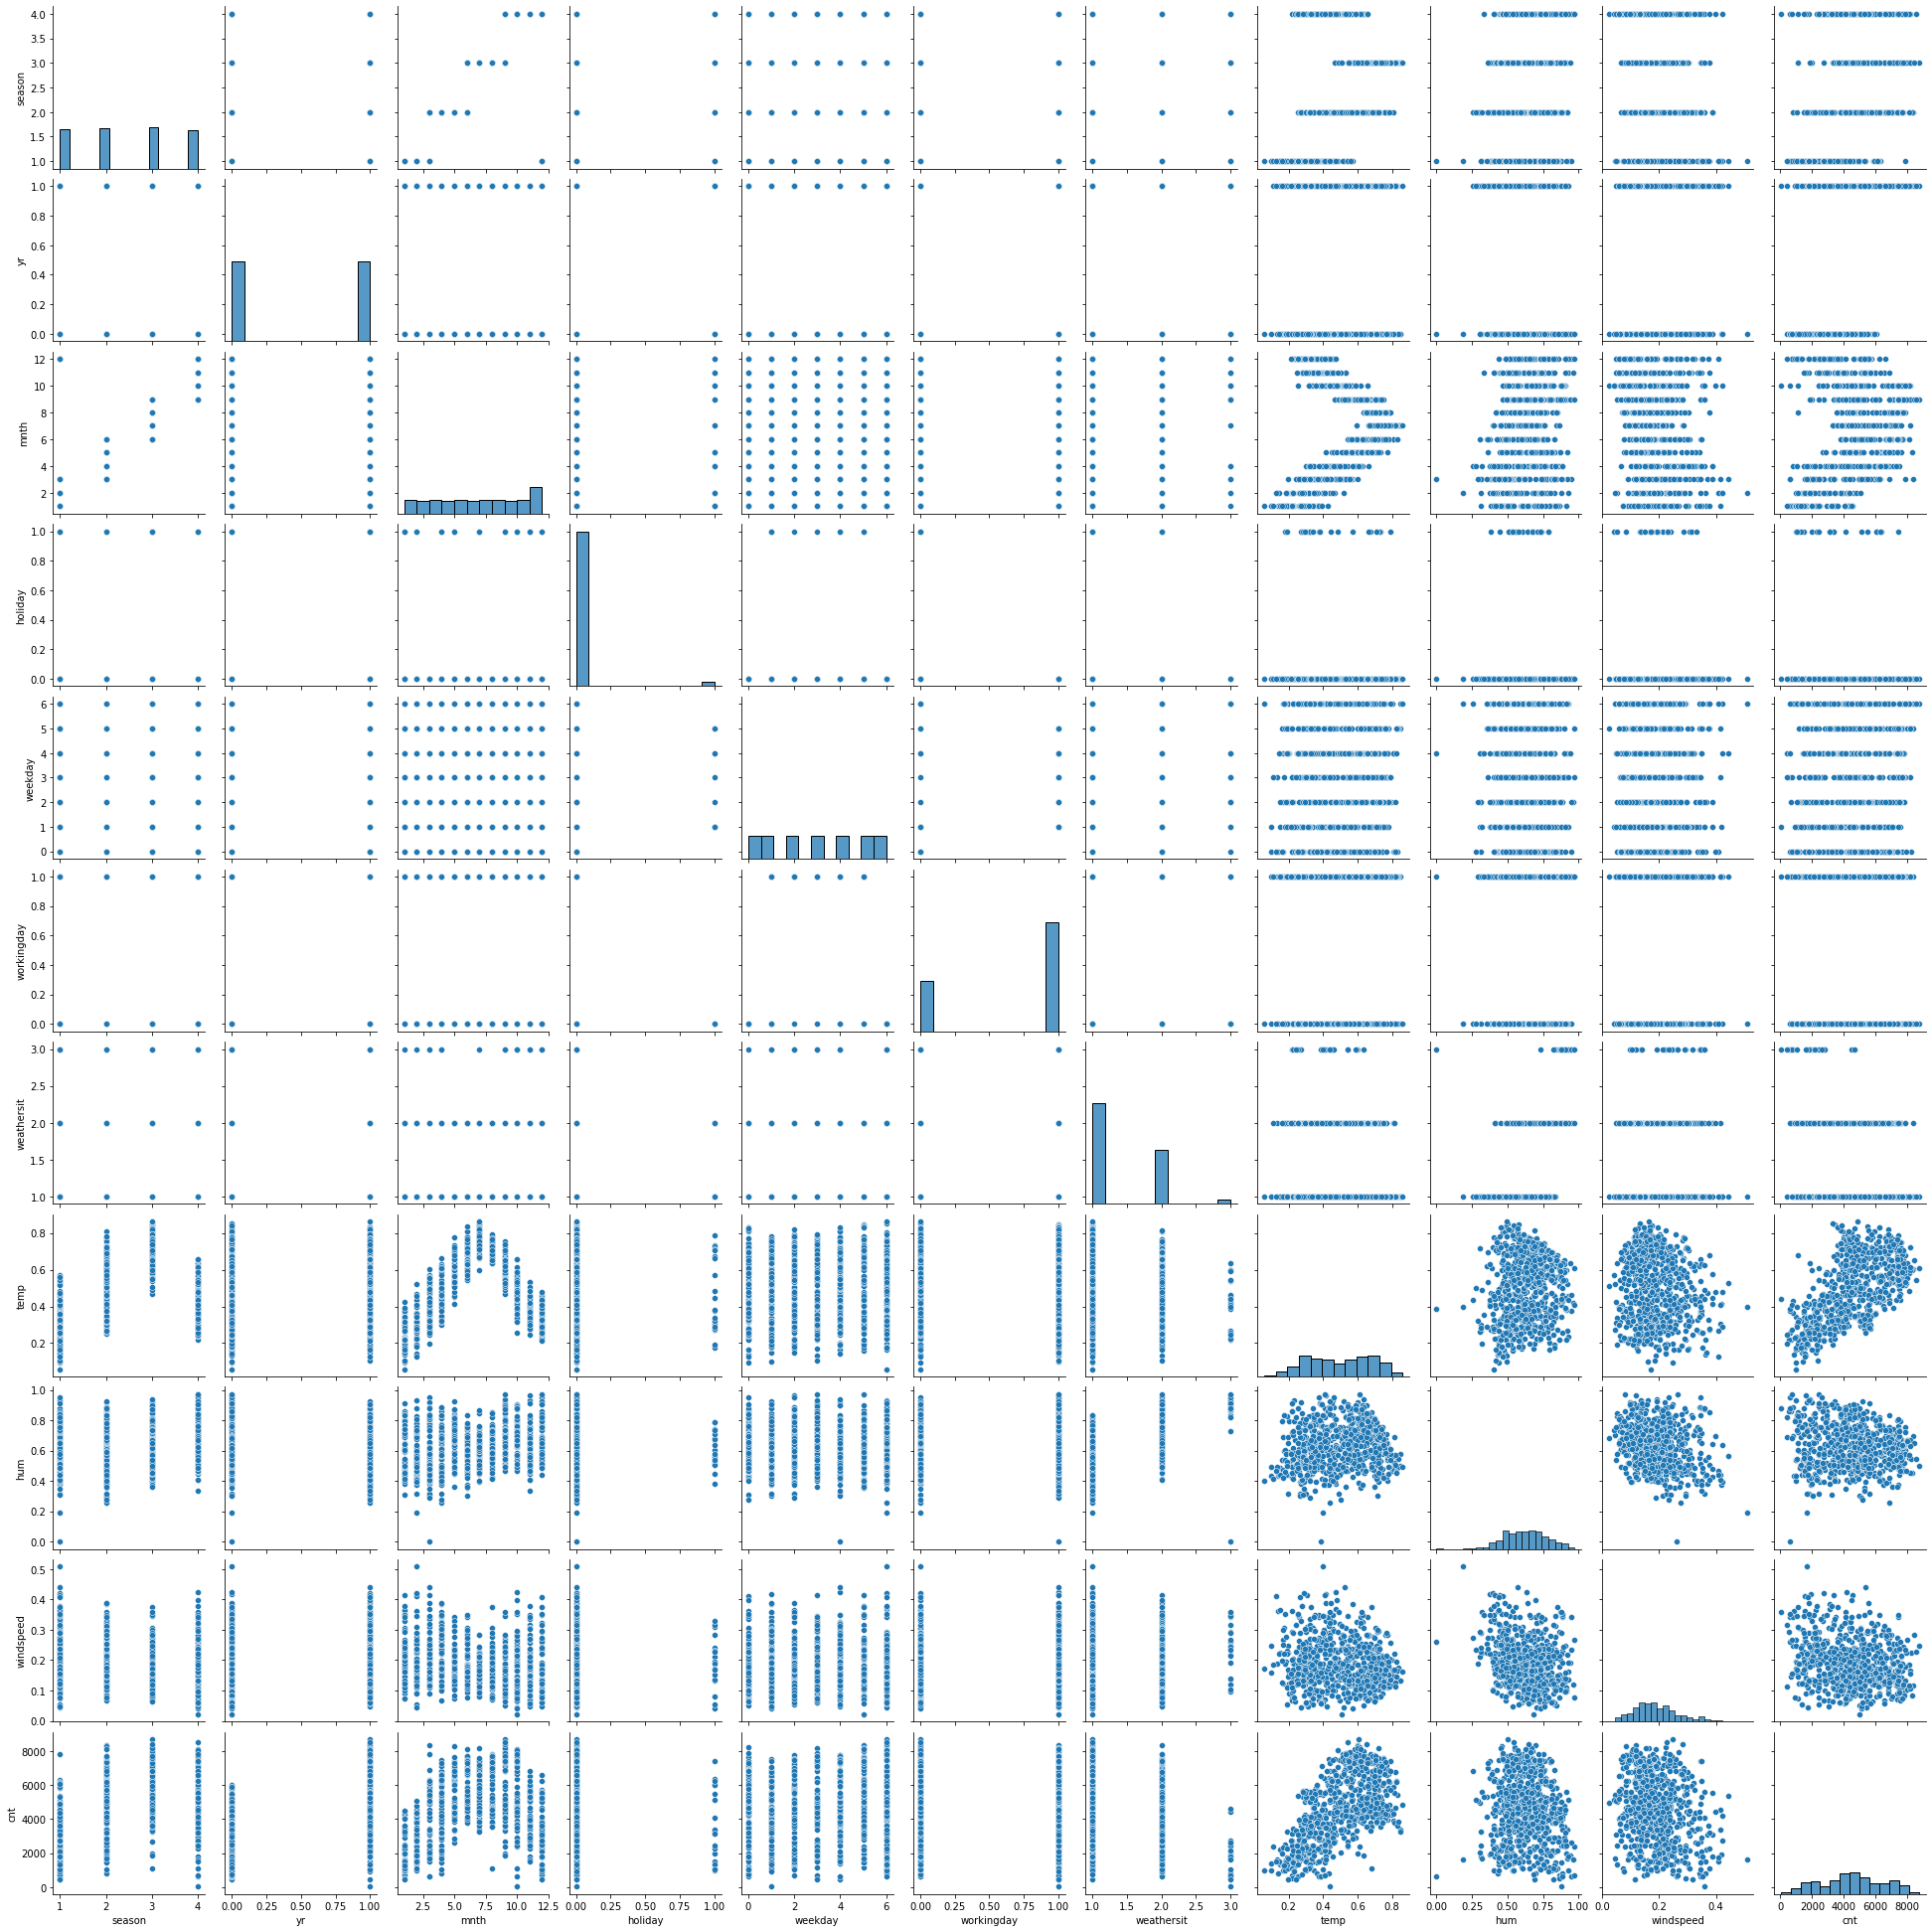

In [24]:
sns.pairplot(bike);

In [25]:
X_numerical = bike[['temp', 'hum', 'windspeed', 'cnt']]

In [26]:
X_numerical

temp       hum  windspeed   cnt
dteday                                         
2011-01-01  0.344167  0.805833   0.160446   985
2011-01-02  0.363478  0.696087   0.248539   801
2011-01-03  0.196364  0.437273   0.248309  1349
2011-01-04  0.200000  0.590435   0.160296  1562
2011-01-05  0.226957  0.436957   0.186900  1600
...              ...       ...        ...   ...
2012-12-27  0.254167  0.652917   0.350133  2114
2012-12-28  0.253333  0.590000   0.155471  3095
2012-12-29  0.253333  0.752917   0.124383  1341
2012-12-30  0.255833  0.483333   0.350754  1796
2012-12-31  0.215833  0.577500   0.154846  2729

[731 rows x 4 columns]

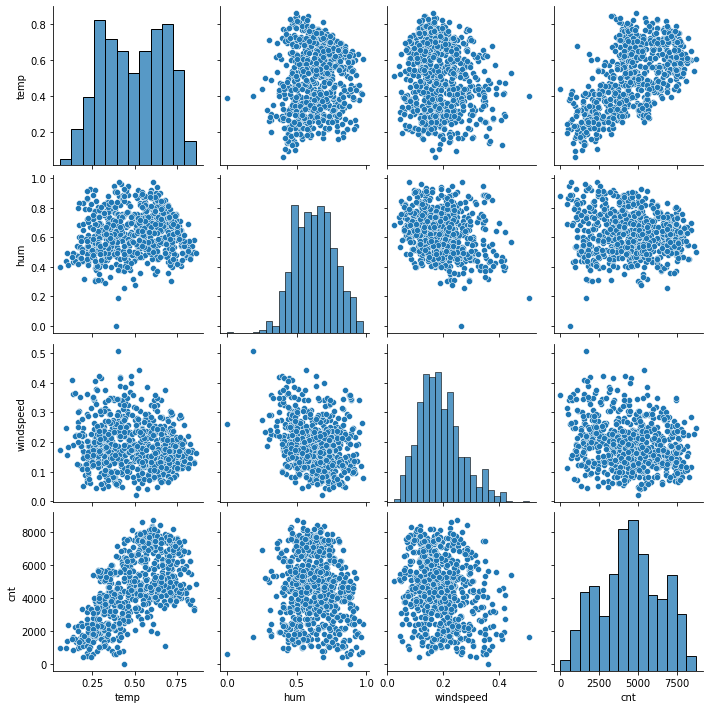

In [27]:
sns.pairplot(X_numerical)

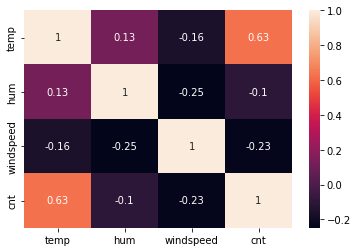

In [28]:
sns.heatmap(X_numerical.corr(), annot = True);

# Etapa 5: Tratamento das bases de dados

In [29]:
X_cat = bike[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']]

In [30]:
X_cat.head()

season  yr  mnth  holiday  weekday  workingday  weathersit
dteday                                                                
2011-01-01       1   0     1        0        6           0           2
2011-01-02       1   0     1        0        0           0           2
2011-01-03       1   0     1        0        1           1           1
2011-01-04       1   0     1        0        2           1           1
2011-01-05       1   0     1        0        3           1           1

Domingo 0
Segunda 1

Domingo - 0 1 0
Segunda - 1 0 0
Terça   - 0 0 1

In [31]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [32]:
X_cat

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [33]:
X_cat.shape

(731, 32)

In [34]:
X_cat = pd.DataFrame(X_cat)

In [35]:
X_cat.head()

0    1    2    3    4    5    6   ...   25   26   27   28   29   30   31
0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  ...  0.0  1.0  1.0  0.0  0.0  1.0  0.0
1  1.0  0.0  0.0  0.0  1.0  0.0  1.0  ...  0.0  0.0  1.0  0.0  0.0  1.0  0.0
2  1.0  0.0  0.0  0.0  1.0  0.0  1.0  ...  0.0  0.0  0.0  1.0  1.0  0.0  0.0
3  1.0  0.0  0.0  0.0  1.0  0.0  1.0  ...  0.0  0.0  0.0  1.0  1.0  0.0  0.0
4  1.0  0.0  0.0  0.0  1.0  0.0  1.0  ...  0.0  0.0  0.0  1.0  1.0  0.0  0.0

[5 rows x 32 columns]

In [36]:
X_numerical.head()

temp       hum  windspeed   cnt
dteday                                         
2011-01-01  0.344167  0.805833   0.160446   985
2011-01-02  0.363478  0.696087   0.248539   801
2011-01-03  0.196364  0.437273   0.248309  1349
2011-01-04  0.200000  0.590435   0.160296  1562
2011-01-05  0.226957  0.436957   0.186900  1600

In [37]:
X_numerical = X_numerical.reset_index()

In [38]:
X_numerical.head()

dteday      temp       hum  windspeed   cnt
0 2011-01-01  0.344167  0.805833   0.160446   985
1 2011-01-02  0.363478  0.696087   0.248539   801
2 2011-01-03  0.196364  0.437273   0.248309  1349
3 2011-01-04  0.200000  0.590435   0.160296  1562
4 2011-01-05  0.226957  0.436957   0.186900  1600

In [39]:
X_all = pd.concat([X_cat, X_numerical], axis = 1)

In [40]:
X_all.head()

0    1    2    3    4  ...     dteday      temp       hum  windspeed   cnt
0  1.0  0.0  0.0  0.0  1.0  ... 2011-01-01  0.344167  0.805833   0.160446   985
1  1.0  0.0  0.0  0.0  1.0  ... 2011-01-02  0.363478  0.696087   0.248539   801
2  1.0  0.0  0.0  0.0  1.0  ... 2011-01-03  0.196364  0.437273   0.248309  1349
3  1.0  0.0  0.0  0.0  1.0  ... 2011-01-04  0.200000  0.590435   0.160296  1562
4  1.0  0.0  0.0  0.0  1.0  ... 2011-01-05  0.226957  0.436957   0.186900  1600

[5 rows x 37 columns]

In [41]:
X_all = X_all.drop(labels=['dteday'], axis = 1)

In [42]:
X_all.head()

0    1    2    3    4    5  ...   30   31      temp       hum  windspeed   cnt
0  1.0  0.0  0.0  0.0  1.0  0.0  ...  1.0  0.0  0.344167  0.805833   0.160446   985
1  1.0  0.0  0.0  0.0  1.0  0.0  ...  1.0  0.0  0.363478  0.696087   0.248539   801
2  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.196364  0.437273   0.248309  1349
3  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.200000  0.590435   0.160296  1562
4  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.226957  0.436957   0.186900  1600

[5 rows x 36 columns]

In [43]:
X = X_all.iloc[:, :-1].values

In [44]:
y = X_all.iloc[:, -1:].values

In [45]:
X.shape

(731, 35)

In [46]:
y.shape

(731, 1)

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
y = scaler.fit_transform(y)

In [48]:
y

array([[0.11079153],
       [0.08962264],
       [0.15266912],
       [0.17717441],
       [0.18154625],
       [0.18223654],
       [0.1711919 ],
       [0.10780028],
       [0.09203866],
       [0.14944777],
       [0.14277497],
       [0.13115509],
       [0.15922688],
       [0.1609526 ],
       [0.14104924],
       [0.13598711],
       [0.11251726],
       [0.07604694],
       [0.18729867],
       [0.21916705],
       [0.1749885 ],
       [0.11033134],
       [0.11090658],
       [0.16037736],
       [0.22583985],
       [0.05568339],
       [0.04705476],
       [0.13173033],
       [0.12379199],
       [0.1235619 ],
       [0.17015647],
       [0.15393465],
       [0.17303267],
       [0.17579383],
       [0.19397147],
       [0.1130925 ],
       [0.18419236],
       [0.19443166],
       [0.17349287],
       [0.18212149],
       [0.17441325],
       [0.1983433 ],
       [0.16682006],
       [0.18028072],
       [0.21755637],
       [0.20628164],
       [0.24079613],
       [0.282

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [50]:
X_train.shape

(584, 35)

In [51]:
X_test.shape

(147, 35)

# Etapa 6: Construção e treinamento do modelo

In [52]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 100, activation='relu', input_shape=(35,)))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               3600      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 23,901
Trainable params: 23,901
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [55]:
epochs_hist = model.fit(X_train, y_train, epochs = 25, batch_size = 50, validation_split=0.2)

Epoch 1/25
10/10 [==============================] - 1s 19ms/step - loss: 0.0831 - val_loss: 0.0274
Epoch 2/25
10/10 [==============================] - 0s 5ms/step - loss: 0.0219 - val_loss: 0.0180
Epoch 3/25
10/10 [==============================] - 0s 6ms/step - loss: 0.0135 - val_loss: 0.0143
Epoch 4/25
10/10 [==============================] - 0s 5ms/step - loss: 0.0095 - val_loss: 0.0128
Epoch 5/25
10/10 [==============================] - 0s 5ms/step - loss: 0.0080 - val_loss: 0.0122
Epoch 6/25
10/10 [==============================] - 0s 5ms/step - loss: 0.0069 - val_loss: 0.0126
Epoch 7/25
10/10 [==============================] - 0s 5ms/step - loss: 0.0061 - val_loss: 0.0120
Epoch 8/25
10/10 [==============================] - 0s 6ms/step - loss: 0.0055 - val_loss: 0.0115
Epoch 9/25
10/10 [==============================] - 0s 5ms/step - loss: 0.0051 - val_loss: 0.0128
Epoch 10/25
10/10 [==============================] - 0s 5ms/step - loss: 0.0045 - val_loss: 0.0128
Epoch 11/25
10/10 

# Etapa 7: Avaliação do modelo 

In [56]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

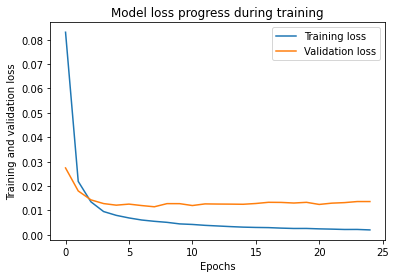

In [68]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model loss progress during training')
plt.xlabel('Epochs')
plt.ylabel('Training and validation loss')
plt.legend(['Training loss', 'Validation loss']);

In [57]:
y_predict = model.predict(X_test)

In [58]:
y_predict

array([[0.16587116],
       [0.3375574 ],
       [0.4727529 ],
       [0.43101415],
       [0.3322023 ],
       [0.43493032],
       [0.49487382],
       [0.8736471 ],
       [0.42153323],
       [0.86214715],
       [0.28542405],
       [0.50035554],
       [0.8157209 ],
       [0.5578786 ],
       [0.28968033],
       [0.72421855],
       [0.15489024],
       [0.50723916],
       [0.8477759 ],
       [0.42824468],
       [0.45995754],
       [0.39223996],
       [0.6382082 ],
       [0.56092626],
       [0.88833416],
       [0.2901811 ],
       [0.7335994 ],
       [0.54082197],
       [0.67104334],
       [0.47819716],
       [0.6338853 ],
       [0.27229917],
       [0.8476584 ],
       [0.59294075],
       [0.61114895],
       [0.89793205],
       [0.86767614],
       [0.48887846],
       [0.43133867],
       [0.48846325],
       [0.78963804],
       [0.54842   ],
       [0.31659773],
       [0.18400812],
       [0.5518381 ],
       [0.573906  ],
       [0.5368977 ],
       [0.793

Text(0, 0.5, 'True values')

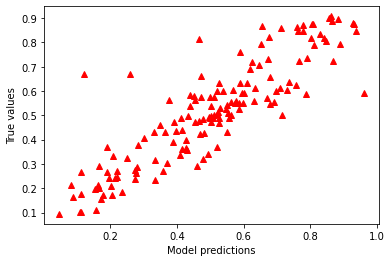

In [59]:
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model predictions')
plt.ylabel('True values')

In [60]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)

Text(0, 0.5, 'True values')

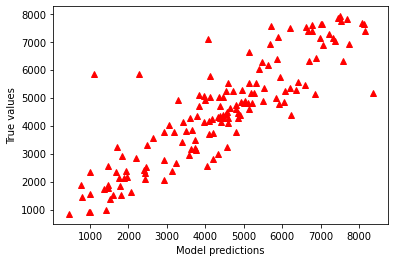

In [61]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model predictions')
plt.ylabel('True values')

In [62]:
k = X_test.shape[1]
k

35

In [63]:
n = len(X_test)
n

147

In [65]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

In [66]:
mae = mean_absolute_error(y_test_orig, y_predict_orig)
mse = mean_squared_error(y_test_orig, y_predict_orig)
rmse = sqrt(mse)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

In [67]:
print("MAE: ", mae, "\nMSE: ", mse, "\nRMSE: ", rmse, "\nR2: ", r2, "\nADJ R2: ", adj_r2)

MAE:  671.0542399088541 
MSE:  901236.636584692 
RMSE:  949.3348390239831 
R2:  0.7573539625320778 
ADJ R2:  0.6808439507178681
